In [1]:
%matplotlib inline


======================================
Getting averaging info from .fif files
======================================

Parse averaging information defined in Elekta Vectorview/TRIUX DACQ (data
acquisition). Extract and average epochs accordingly. Modify some
averaging parameters and get epochs.



In [2]:
# Author: Jussi Nurminen (jnu@iki.fi)
#
# License: BSD (3-clause)


import mne
import os
from mne.datasets import multimodal
from mne import AcqParserFIF

fname_raw = os.path.join(multimodal.data_path(), 'multimodal_raw.fif')


print(__doc__)

Using default location ~/mne_data for multimodal...

[........................................] 100.00000 | (153.7 MB / 153.7 MB)   
Verifying download hash.
Decompressing the archive: /home/arasdar/mne_data/MNE-multimodal-data.tar.gz
(please be patient, this can take some time)
Automatically created module for IPython interactive environment


Read raw file and create parser instance



In [3]:
raw = mne.io.read_raw_fif(fname_raw)
ap = AcqParserFIF(raw.info)

Opening raw data file /home/arasdar/mne_data/MNE-multimodal-data/multimodal_raw.fif...
    Read a total of 7 projection items:
        grad_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-v5 (1 x 306)  idle
    Range : 183600 ... 576599 =    305.687 ...   960.014 secs
Ready.
Current compensation grade : 0


Check DACQ defined averaging categories and other info



In [4]:
print(ap)

<AcqParserFIF | categories: 20 (8 in use), events: 17 (8 in use)
Averaging categories:
1: "Visual Upper right"
2: "Visual Lower right"
3: "Visual Lower left"
4: "Visual Upper left"
5: "Somato right"
6: "Somato left"
7: "Auditory right"
8: "Auditory left">


Extract epochs corresponding to a category



104 matching events found
Created an SSP operator (subspace dimension = 7)
7 projection items activated


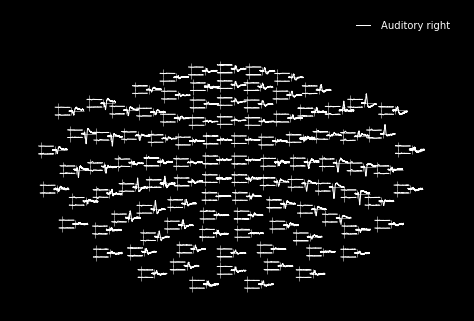

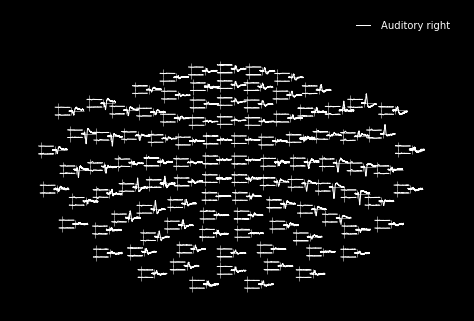

In [5]:
cond = ap.get_condition(raw, 'Auditory right')
epochs = mne.Epochs(raw, **cond)
epochs.average().plot_topo()

Get epochs from all conditions, average



In [ ]:
evokeds = []
for cat in ap.categories:
    cond = ap.get_condition(raw, cat)
    # copy (supported) rejection parameters from DACQ settings
    epochs = mne.Epochs(raw, reject=ap.reject, flat=ap.flat, **cond)
    evoked = epochs.average()
    evoked.comment = cat['comment']
    evokeds.append(evoked)
# save all averages to an evoked fiff file
# fname_out = 'multimodal-ave.fif'
# mne.write_evokeds(fname_out, evokeds)

118 matching events found
Created an SSP operator (subspace dimension = 7)
7 projection items activated
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on GRAD : ['MEG 0812']
    Rejecting  epoch based on GRAD : ['MEG 0812']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on GRAD : ['MEG 0812']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based

    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
118 matching events found


Make a new averaging category



In [ ]:
newcat = dict()
newcat['comment'] = 'Visual lower left, longer epochs'
newcat['event'] = 3  # reference event
newcat['start'] = -.2  # epoch start rel. to ref. event (in seconds)
newcat['end'] = .7  # epoch end
newcat['reqevent'] = 0  # additional required event; 0 if none
newcat['reqwithin'] = .5  # ...required within .5 sec (before or after)
newcat['reqwhen'] = 2  # ...required before (1) or after (2) ref. event
newcat['index'] = 9  # can be set freely

cond = ap.get_condition(raw, newcat)
epochs = mne.Epochs(raw, reject=ap.reject, flat=ap.flat, **cond)
epochs.average().plot()